In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Merge the 12 months of sales data into a single CSV file

In [2]:
sales1 = pd.read_csv(r'/Users/zayed/Documents/Data analysis projects/Solving real world data science tasks/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
sales1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
sales1.shape

(18383, 6)

In [4]:
files = [file for file in os.listdir(r'/Users/zayed/Documents/Data analysis projects/Solving real world data science tasks/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [5]:
allmonthsdata = pd.DataFrame()
for file in files:
    df = pd.read_csv( r'/Users/zayed/Documents/Data analysis projects/Solving real world data science tasks/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    allmonthsdata = pd.concat([allmonthsdata, df])

allmonthsdata.shape

(186850, 6)

In [6]:
# We can see that there are 186850 observations now. This indicates that the concatenation worked, let us run head() to make sure
allmonthsdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
# Great, now we will export to a single csv file
allmonthsdata.to_csv("allmonthsdata.csv", index=False)

In [8]:
sales = pd.read_csv("allmonthsdata.csv")
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [9]:
#Clean up sales data. 
sales = sales.dropna(how='all')
sales.shape

(186305, 6)

In [10]:
sales = sales[sales['Order ID'] != 'Order ID']
sales.shape

(185950, 6)

### Feature Engineering

In [11]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
sales['Price Each'] = sales['Price Each'].astype(float)
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales.head()

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_14036/1314687641.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [13]:
sales['Order Month'] = sales['Order Date'].dt.month_name()
sales['Order Month'].value_counts()

Order Month
December     24984
October      20282
April        18279
November     17573
May          16566
March        15153
July         14293
June         13554
February     11975
August       11961
September    11621
January       9709
Name: count, dtype: int64

In [14]:
sales['State'] =  sales['Purchase Address'].str.split(',').str.get(2).str.split(' ').str.get(1)


In [15]:
sales['City'] = sales['Purchase Address'].str.split(',').str.get(1).str.strip()

In [16]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Revenue'] = sales['Quantity Ordered'] * sales['Price Each']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State,City,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,NY,New York City,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,NY,New York City,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,NY,New York City,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,CA,San Francisco,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,GA,Atlanta,11.95


In [17]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Order Month                 object
State                       object
City                        object
Revenue                    float64
dtype: object

In [18]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State,City,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,NY,New York City,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,NY,New York City,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,NY,New York City,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,CA,San Francisco,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,GA,Atlanta,11.95


### 1. What was the best month for sales? 

In [19]:
sales['Month_number'] = pd.to_datetime(sales['Order Date']).dt.month
sales.groupby('Month_number')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).sort_values(by='Month_number')

,Month_number,Revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


<Axes: xlabel='Month_number', ylabel='Revenue'>

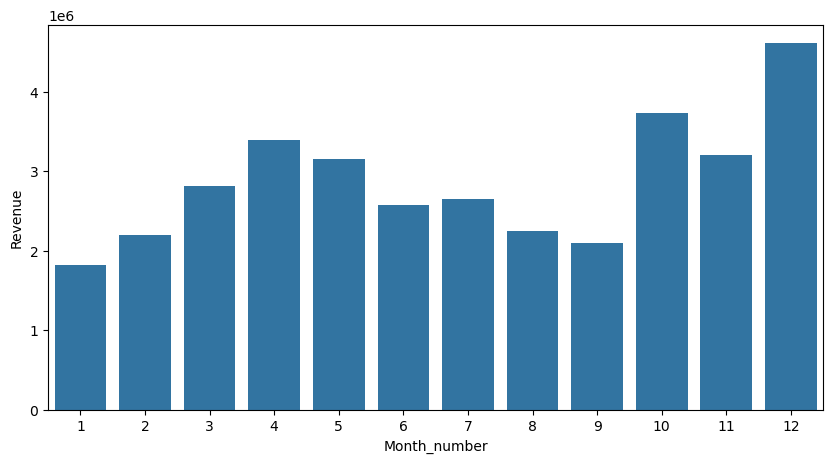

In [20]:
monthplot = sales.groupby('Month_number')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).sort_values(by='Month_number')
plt.figure(figsize=(10, 5))
sns.barplot(monthplot,x =  'Month_number', y = 'Revenue')

### What city had the highest number of sales?

In [21]:
sales.groupby('City')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

,City,Revenue
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


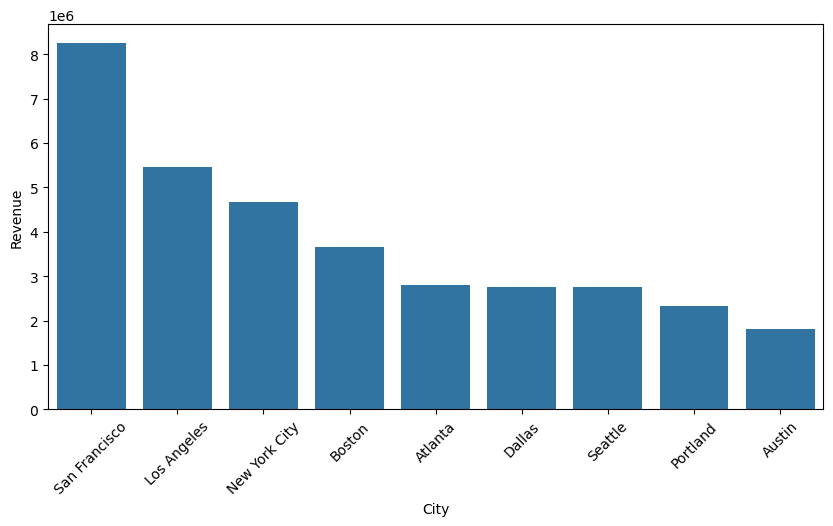

In [22]:
cityplot = sales.groupby('City')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(cityplot,x =  'City', y = 'Revenue')
plt.xticks(rotation = 45)
plt.show()


### What time should we display advertisements to maximize the likelihood of the customer buying the product? 

In [23]:
orderbyhour

NameError: name 'orderbyhour' is not defined

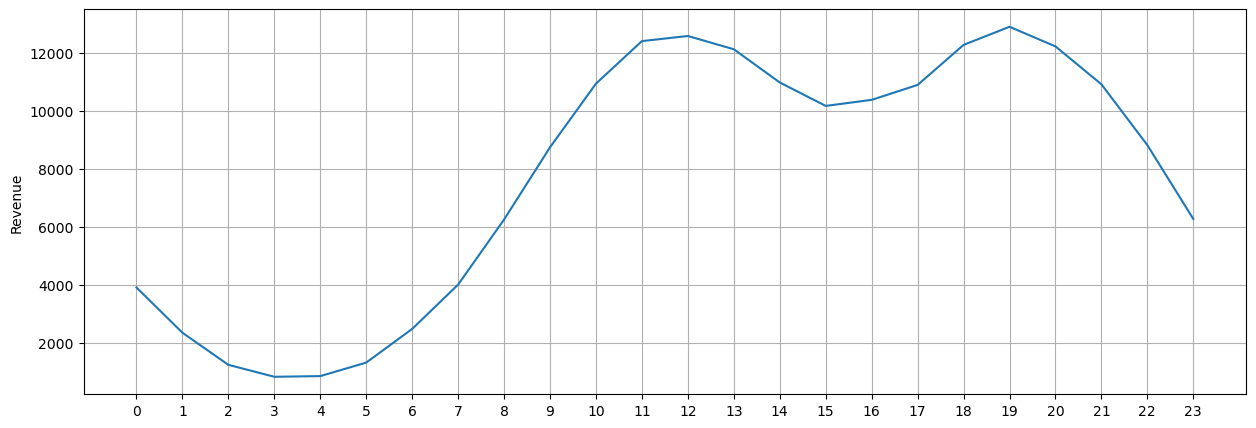

In [ ]:
sales['hour'] = sales['Order Date'].dt.hour #Create hour column

orderbyhour = sales.groupby('hour')['Revenue'].count().reset_index() # group count of orders by hour
plt.figure(figsize=(15,5))
sns.lineplot(orderbyhour, x = range(0,24), y = 'Revenue')
plt.xscale('linear')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

### What products are most often solved together?

In [57]:
sales['Order ID'] = pd.to_numeric(sales['Order ID'])

In [ ]:
# create a dataframe of observations that have more than one item on the Order ID
duplicated_sales = sales[sales['Order ID'].duplicated(keep=False)] #filters to show observations with Order IDs that repeat in the dataframe
filtered_ds = duplicated_sales[['Order ID', 'Product']]
filtered_ds

,Order ID,Product
16,295681,Google Phone
17,295681,USB-C Charging Cable
18,295681,Bose SoundSport Headphones
19,295681,Wired Headphones
36,295698,Vareebadd Phone
...,...,...
186820,222882,AA Batteries (4-pack)
186822,222884,Google Phone
186823,222884,USB-C Charging Cable
186842,222903,iPhone


In [95]:
merged = pd.merge(filtered_ds, filtered_ds, on='Order ID', how = 'inner')[['Product_x', 'Product_y']]
merged[merged['Product_x'] != merged['Product_y']].value_counts(ascending=False).reset_index()
merged

,Product_x,Product_y
0,Google Phone,Google Phone
1,Google Phone,USB-C Charging Cable
2,Google Phone,Bose SoundSport Headphones
3,Google Phone,Wired Headphones
4,USB-C Charging Cable,Google Phone
...,...,...
30464,USB-C Charging Cable,USB-C Charging Cable
30465,iPhone,iPhone
30466,iPhone,Lightning Charging Cable
30467,Lightning Charging Cable,iPhone


### What product sold the most?

In [126]:
sales.Product.value_counts().reset_index().sort_values(by='count', ascending=False)
qty = sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index()
qty



,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


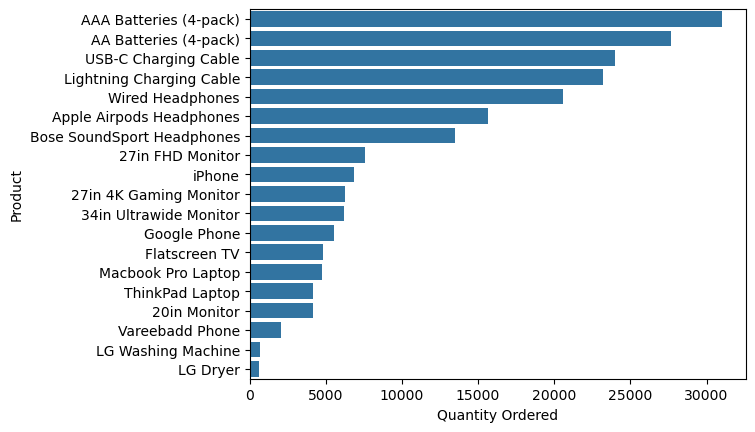

In [129]:
sns.barplot(qty, y = 'Product', x = 'Quantity Ordered', orient='h')
plt.show()